In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
temperature_nsw = pd.read_csv('A:UNSW/project/project-main/project-main/data/NSW/temperature_nsw.csv/temperature_nsw.csv', sep = ',', header =0 )
totaldemand_nsw = pd.read_csv('A:UNSW/project/project-main/project-main/data/NSW/totaldemand_nsw.csv/totaldemand_nsw.csv', sep = ',', header = 0)
forecastdemand_nsw = pd.read_csv('A:UNSW/project/project-main/project-main/data/forecastdemand_nsw.csv/forecastdemand_nsw.csv', sep = ',', header = 0, usecols=[0, 1, 2, 3])


In [2]:
print(temperature_nsw.head())
print(temperature_nsw.tail())
print(temperature_nsw['LOCATION'].unique())



    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
['Bankstown']


In [3]:
#drop column 'LOCATION'
temperature_nsw.drop(['LOCATION'],axis=1,inplace= True)

#convert from object to dtatime
temperature_nsw["DATETIME"] =pd.to_datetime(temperature_nsw["DATETIME"], dayfirst=True)

temperature_nsw["year"] = temperature_nsw["DATETIME"].dt.year
temperature_nsw["month"] = temperature_nsw["DATETIME"].dt.month
temperature_nsw["day"] = temperature_nsw["DATETIME"].dt.day
temperature_nsw["time"] = temperature_nsw["DATETIME"].dt.time
print(temperature_nsw.head())

# Extract the date (year-month-day) from the 'DATETIME' column
temperature_nsw['date'] = temperature_nsw['DATETIME'].dt.date
# Group by the 'date' column and calculate the average temperature

average_temperature_by_day = temperature_nsw.groupby('date')['TEMPERATURE'].mean().reset_index()
print(average_temperature_by_day.head())

             DATETIME  TEMPERATURE  year  month  day      time
0 2010-01-01 00:00:00         23.1  2010      1    1  00:00:00
1 2010-01-01 00:01:00         23.1  2010      1    1  00:01:00
2 2010-01-01 00:30:00         22.9  2010      1    1  00:30:00
3 2010-01-01 00:50:00         22.7  2010      1    1  00:50:00
4 2010-01-01 01:00:00         22.6  2010      1    1  01:00:00
         date  TEMPERATURE
0  2010-01-01    25.094000
1  2010-01-02    24.765385
2  2010-01-03    19.429825
3  2010-01-04    20.625926
4  2010-01-05    22.660417


In [4]:
# Group by the 'year','month' and 'date' column and get max temperature of the day

temperature_nsw = temperature_nsw.groupby(['year', 'month', 'day','date','DATETIME'])['TEMPERATURE'].max()
temperature_nsw = temperature_nsw.reset_index()

temperature_nsw = temperature_nsw[temperature_nsw['year'] <= 2020]
temperature_nsw

,year,month,day,date,DATETIME,TEMPERATURE
0,2010,1,1,2010-01-01,2010-01-01 00:00:00,23.1
1,2010,1,1,2010-01-01,2010-01-01 00:01:00,23.1
2,2010,1,1,2010-01-01,2010-01-01 00:30:00,22.9
3,2010,1,1,2010-01-01,2010-01-01 00:50:00,22.7
4,2010,1,1,2010-01-01,2010-01-01 01:00:00,22.6
...,...,...,...,...,...,...
216089,2020,12,31,2020-12-31,2020-12-31 21:30:00,20.1
216090,2020,12,31,2020-12-31,2020-12-31 22:00:00,19.9
216091,2020,12,31,2020-12-31,2020-12-31 22:30:00,19.6
216092,2020,12,31,2020-12-31,2020-12-31 23:00:00,19.3


In [5]:
print(totaldemand_nsw.head())
print(totaldemand_nsw.tail())


print(totaldemand_nsw['REGIONID'].unique())


        DATETIME  TOTALDEMAND REGIONID
0  1/1/2010 0:00      8038.00     NSW1
1  1/1/2010 0:30      7809.31     NSW1
2  1/1/2010 1:00      7483.69     NSW1
3  1/1/2010 1:30      7117.23     NSW1
4  1/1/2010 2:00      6812.03     NSW1
               DATETIME  TOTALDEMAND REGIONID
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1
['NSW1']


In [6]:
# Convert 'DATETIME' from object to datetime format
totaldemand_nsw["DATETIME"] = pd.to_datetime(totaldemand_nsw["DATETIME"], dayfirst=True)

# Extract year, month, day, and time from 'DATETIME' column
totaldemand_nsw["year"] = totaldemand_nsw["DATETIME"].dt.year
totaldemand_nsw["month"] = totaldemand_nsw["DATETIME"].dt.month
totaldemand_nsw["day"] = totaldemand_nsw["DATETIME"].dt.day
totaldemand_nsw["time"] = totaldemand_nsw["DATETIME"].dt.time

totaldemand_nsw = totaldemand_nsw[totaldemand_nsw['year'] <= 2020]
# Display the first few rows to verify
print(totaldemand_nsw.head())
print(totaldemand_nsw.tail())

             DATETIME  TOTALDEMAND REGIONID  year  month  day      time
0 2010-01-01 00:00:00      8038.00     NSW1  2010      1    1  00:00:00
1 2010-01-01 00:30:00      7809.31     NSW1  2010      1    1  00:30:00
2 2010-01-01 01:00:00      7483.69     NSW1  2010      1    1  01:00:00
3 2010-01-01 01:30:00      7117.23     NSW1  2010      1    1  01:30:00
4 2010-01-01 02:00:00      6812.03     NSW1  2010      1    1  02:00:00
                  DATETIME  TOTALDEMAND REGIONID  year  month  day      time
192859 2020-12-31 21:30:00      7072.75     NSW1  2020     12   31  21:30:00
192860 2020-12-31 22:00:00      7062.97     NSW1  2020     12   31  22:00:00
192861 2020-12-31 22:30:00      7172.60     NSW1  2020     12   31  22:30:00
192862 2020-12-31 23:00:00      7125.65     NSW1  2020     12   31  23:00:00
192863 2020-12-31 23:30:00      7080.04     NSW1  2020     12   31  23:30:00


In [7]:
totaldemand_nsw.drop(['REGIONID'],axis=1,inplace= True)
print(totaldemand_nsw.head())

             DATETIME  TOTALDEMAND  year  month  day      time
0 2010-01-01 00:00:00      8038.00  2010      1    1  00:00:00
1 2010-01-01 00:30:00      7809.31  2010      1    1  00:30:00
2 2010-01-01 01:00:00      7483.69  2010      1    1  01:00:00
3 2010-01-01 01:30:00      7117.23  2010      1    1  01:30:00
4 2010-01-01 02:00:00      6812.03  2010      1    1  02:00:00


In [8]:
print(forecastdemand_nsw.head())
print(forecastdemand_nsw.tail())

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND
0        2009123018     NSW1        71         7832.04
1        2009123019     NSW1        70         7832.04
2        2009123020     NSW1        69         7832.03
3        2009123021     NSW1        68         7832.03
4        2009123022     NSW1        67         7830.96
          PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND
10906014        2021031736     NSW1         5         7028.45
10906015        2021031737     NSW1         4         7041.65
10906016        2021031738     NSW1         3         7087.60
10906017        2021031739     NSW1         2         7087.28
10906018        2021031740     NSW1         1         7126.37


In [9]:
temperature_nsw.info()
temperature_nsw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216094 entries, 0 to 216093
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   year         216094 non-null  int64         
 1   month        216094 non-null  int64         
 2   day          216094 non-null  int64         
 3   date         216094 non-null  object        
 4   DATETIME     216094 non-null  datetime64[ns]
 5   TEMPERATURE  216094 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.5+ MB


,year,month,day,TEMPERATURE
count,216094.000000,216094.000000,216094.000000,216094.000000
mean,2015.016030,6.513402,15.687423,17.340490
std,3.154499,3.456901,8.803392,5.859086
min,2010.000000,1.000000,1.000000,-1.300000
25%,2012.000000,4.000000,8.000000,13.300000
50%,2015.000000,7.000000,16.000000,17.600000
75%,2018.000000,10.000000,23.000000,21.300000
max,2020.000000,12.000000,31.000000,44.700000


In [10]:
totaldemand_nsw.info()
totaldemand_nsw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192864 entries, 0 to 192863
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     192864 non-null  datetime64[ns]
 1   TOTALDEMAND  192864 non-null  float64       
 2   year         192864 non-null  int64         
 3   month        192864 non-null  int64         
 4   day          192864 non-null  int64         
 5   time         192864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 10.3+ MB


,TOTALDEMAND,year,month,day
count,192864.000000,192864.000000,192864.000000,192864.000000
mean,8124.801133,2015.000747,6.522648,15.730463
std,1300.636089,3.162483,3.448789,8.800464
min,5074.630000,2010.000000,1.000000,1.000000
25%,7161.415000,2012.000000,4.000000,8.000000
50%,8067.205000,2015.000000,7.000000,16.000000
75%,8973.125000,2018.000000,10.000000,23.000000
max,14579.860000,2020.000000,12.000000,31.000000


In [11]:
forecastdemand_nsw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 332.8+ MB


In [12]:
population_nsw = pd.read_csv('A:UNSW/project/project-main/project-main/data/nsw_population.csv', sep = ',', header = 0)
population_nsw.head()

,Year,TotalPopulation
0,2010,7144292
1,2011,7218529
2,2012,7304244
3,2013,7404032
4,2014,7508353


    year   TOTALDEMAND  TotalPopulation  demand_per_person
0   2010  1.543019e+08          7144292          21.597926
1   2011  1.529197e+08          7218529          21.184333
2   2012  1.449939e+08          7304244          19.850634
3   2013  1.398375e+08          7404032          18.886666
4   2014  1.387199e+08          7508353          18.475413
5   2015  1.398054e+08          7616168          18.356392
6   2016  1.401571e+08          7732858          18.124877
7   2017  1.411039e+08          7855316          17.962853
8   2018  1.401582e+08          7954476          17.620040
9   2019  1.395390e+08          8046748          17.341038
10  2020  1.354453e+08          8110610          16.699762


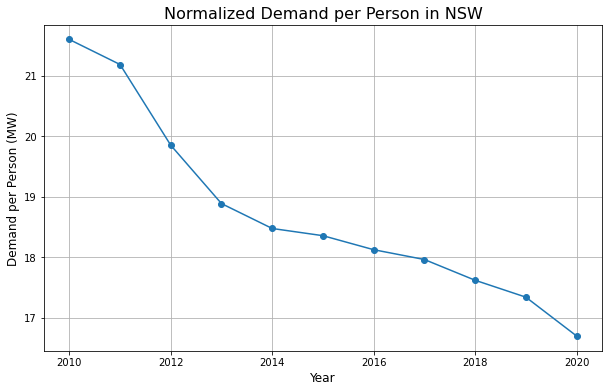

In [13]:
#Calculate total demand per year
total_demand_per_year = totaldemand_nsw.groupby('year')['TOTALDEMAND'].sum().reset_index()

# Merge total demand with population data based on the 'year'
total_demand_per_year = pd.merge(total_demand_per_year, population_nsw, left_on='year', right_on='Year')

# Normalize total demand by population
total_demand_per_year['demand_per_person'] = total_demand_per_year['TOTALDEMAND'] / total_demand_per_year['TotalPopulation']

#Display the result
print(total_demand_per_year[['year', 'TOTALDEMAND', 'TotalPopulation', 'demand_per_person']])

#Plot the normalized demand
plt.figure(figsize=(10, 6))
plt.plot(total_demand_per_year['year'], total_demand_per_year['demand_per_person'], marker='o', linestyle='-')
plt.title('Normalized Demand per Person in NSW', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Demand per Person (MW)', fontsize=12)
plt.grid(True)
plt.show()

    year   TOTALDEMAND  TotalPopulation  demand_per_person
0   2010  1.543019e+08          7144292          21.597926
1   2011  1.529197e+08          7218529          21.184333
2   2012  1.449939e+08          7304244          19.850634
3   2013  1.398375e+08          7404032          18.886666
4   2014  1.387199e+08          7508353          18.475413
5   2015  1.398054e+08          7616168          18.356392
6   2016  1.401571e+08          7732858          18.124877
7   2017  1.411039e+08          7855316          17.962853
8   2018  1.401582e+08          7954476          17.620040
9   2019  1.395390e+08          8046748          17.341038
10  2020  1.354453e+08          8110610          16.699762


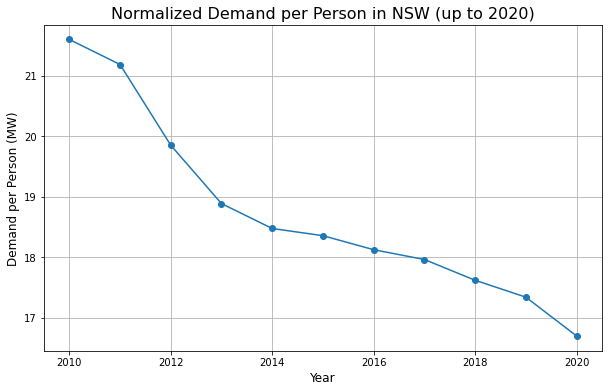

In [14]:

total_demand_per_year = totaldemand_nsw.groupby('year')['TOTALDEMAND'].sum().reset_index()

#Merge total demand with population data based on the 'year'
total_demand_per_year = pd.merge(total_demand_per_year, population_nsw, left_on='year', right_on='Year')

#Normalize total demand by population
total_demand_per_year['demand_per_person'] = total_demand_per_year['TOTALDEMAND'] / total_demand_per_year['TotalPopulation']


print(total_demand_per_year[['year', 'TOTALDEMAND', 'TotalPopulation', 'demand_per_person']])

plt.figure(figsize=(10, 6))
plt.plot(total_demand_per_year['year'], total_demand_per_year['demand_per_person'], marker='o', linestyle='-')
plt.title('Normalized Demand per Person in NSW (up to 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Demand per Person (MW)', fontsize=12)
plt.grid(True)
plt.show()


# Exploratory Data Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from datetime import datetime

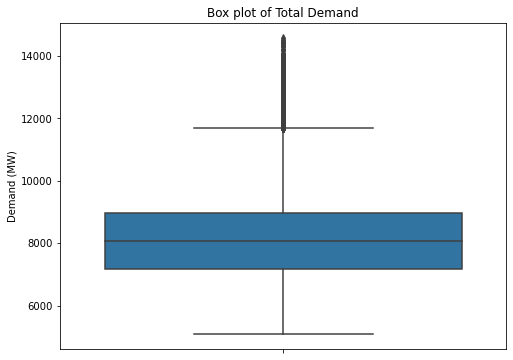

In [16]:
#Electricity Demand data
#understand shape and central tendencies of data
plt.figure(figsize=(8, 6))
sns.boxplot(data=totaldemand_nsw, y='TOTALDEMAND')
plt.title('Box plot of Total Demand')
plt.ylabel('Demand (MW)')
plt.show()
     

In [17]:
totaldemand_nsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192864 entries, 0 to 192863
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     192864 non-null  datetime64[ns]
 1   TOTALDEMAND  192864 non-null  float64       
 2   year         192864 non-null  int64         
 3   month        192864 non-null  int64         
 4   day          192864 non-null  int64         
 5   time         192864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 10.3+ MB


  day_type  TOTALDEMAND
0  Weekday  7867.920425
1  Weekend  7311.355355


<ipython-input-18-a3bdc6baa496>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldemand_nsw_2020['day_of_week'] = totaldemand_nsw_2020['DATETIME'].dt.dayofweek
<ipython-input-18-a3bdc6baa496>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldemand_nsw_2020['day_type'] = totaldemand_nsw_2020['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


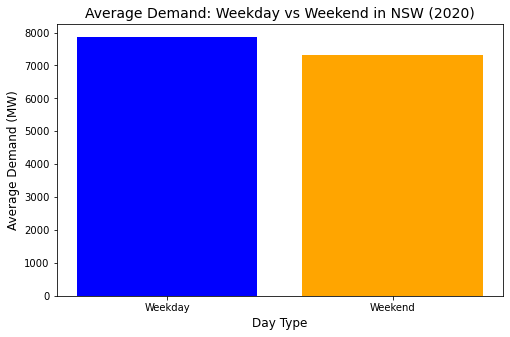

In [18]:
# Convert the 'DateTime' column to datetime format if not already in that format
totaldemand_nsw['DATETIME'] = pd.to_datetime(totaldemand_nsw['DATETIME'], dayfirst=True)

# Filter data for the year 2020
totaldemand_nsw_2020 = totaldemand_nsw.loc[totaldemand_nsw['DATETIME'].dt.year == 2020]

# Extract the day of the week (0 = Monday, 6 = Sunday)
totaldemand_nsw_2020['day_of_week'] = totaldemand_nsw_2020['DATETIME'].dt.dayofweek

# Create a new column for "Weekday" or "Weekend"
totaldemand_nsw_2020['day_type'] = totaldemand_nsw_2020['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by 'day_type' and calculate the mean demand
mean_demand_by_day_type = totaldemand_nsw_2020.groupby('day_type')['TOTALDEMAND'].mean().reset_index()

# Print the results
print(mean_demand_by_day_type)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(mean_demand_by_day_type['day_type'], mean_demand_by_day_type['TOTALDEMAND'], color=['blue', 'orange'])
plt.title('Average Demand: Weekday vs Weekend in NSW (2020)', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Demand (MW)', fontsize=12)
plt.show()

<ipython-input-19-7c6846929c00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldemand_nsw_2020['hour'] = totaldemand_nsw_2020['DATETIME'].dt.hour


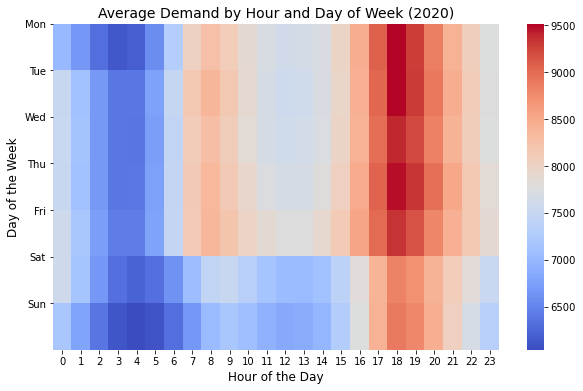

In [19]:
totaldemand_nsw_2020['hour'] = totaldemand_nsw_2020['DATETIME'].dt.hour
demand_pivot = totaldemand_nsw_2020.pivot_table(values='TOTALDEMAND', index='day_of_week', columns='hour', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(demand_pivot, cmap='coolwarm', annot=False)
plt.title('Average Demand by Hour and Day of Week (2020)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


<ipython-input-20-f18690c5970d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldemand_nsw_2020['hour'] = totaldemand_nsw_2020['DATETIME'].dt.hour


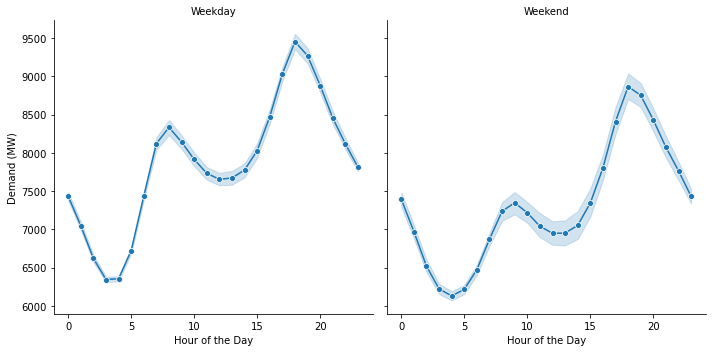

In [20]:
totaldemand_nsw_2020['hour'] = totaldemand_nsw_2020['DATETIME'].dt.hour

g = sns.FacetGrid(totaldemand_nsw_2020, col='day_type', height=5, aspect=1)
g.map(sns.lineplot, 'hour', 'TOTALDEMAND', marker='o')
g.set_axis_labels('Hour of the Day', 'Demand (MW)')
g.set_titles("{col_name}")
plt.show()

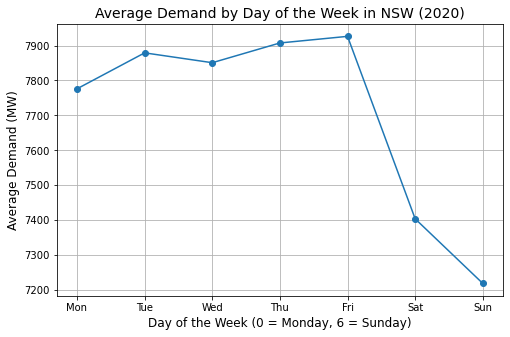

In [21]:
daily_mean_demand = totaldemand_nsw_2020.groupby('day_of_week')['TOTALDEMAND'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(daily_mean_demand['day_of_week'], daily_mean_demand['TOTALDEMAND'], marker='o')
plt.title('Average Demand by Day of the Week in NSW (2020)', fontsize=14)
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)', fontsize=12)
plt.ylabel('Average Demand (MW)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()



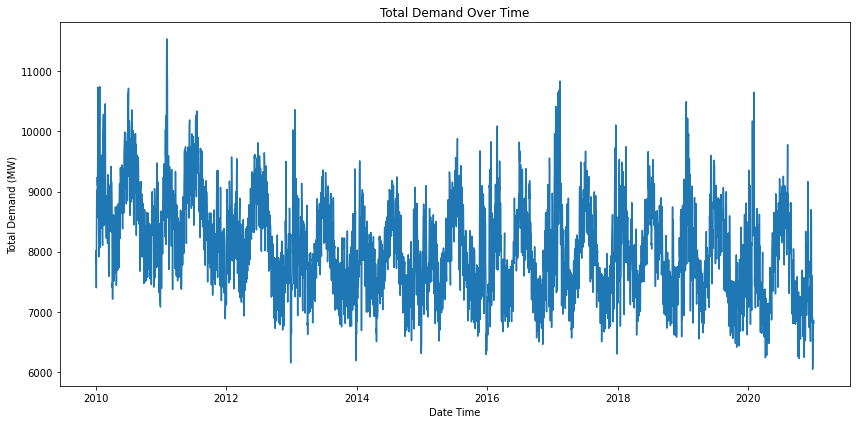

In [22]:

totaldemand_nsw['DATETIME'] = pd.to_datetime(totaldemand_nsw['DATETIME'])

# Set 'DATETIME' as the index
totaldemand_nsw = totaldemand_nsw.set_index('DATETIME')

# Resample the data for daily mean values
daily_totaldemand_nsw = totaldemand_nsw.resample('D').mean()

plt.figure(figsize=(12, 6))
# Plot the data
plt.plot(daily_totaldemand_nsw.index, daily_totaldemand_nsw['TOTALDEMAND'], linestyle='-')

# Set plot title and labels
plt.title('Total Demand Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

# Format the x-axis to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


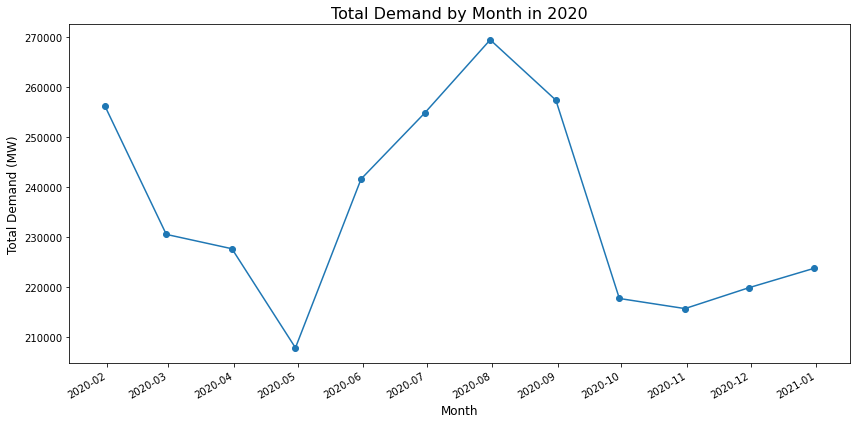

In [23]:


# Filter data for the year 2020
monthly_totaldemand_nsw_2020 = daily_totaldemand_nsw.loc['2020']

# Resample data by month and calculate the total demand for each month
monthly_totaldemand_nsw_2020 = monthly_totaldemand_nsw_2020.resample('M').sum()

# Plot the data for 2020
plt.figure(figsize=(12, 6))
plt.plot(monthly_totaldemand_nsw_2020.index, monthly_totaldemand_nsw_2020['TOTALDEMAND'], linestyle='-', marker='o')

# Set plot title and labels
plt.title('Total Demand by Month in 2020', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Demand (MW)', fontsize=12)

# Format the x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


    year  TEMPERATURE
0   2010    17.206935
1   2011    16.902286
2   2012    16.614590
3   2013    17.488194
4   2014    17.374873
5   2015    16.864041
6   2016    17.880769
7   2017    17.933355
8   2018    17.528891
9   2019    17.704812
10  2020    17.245429


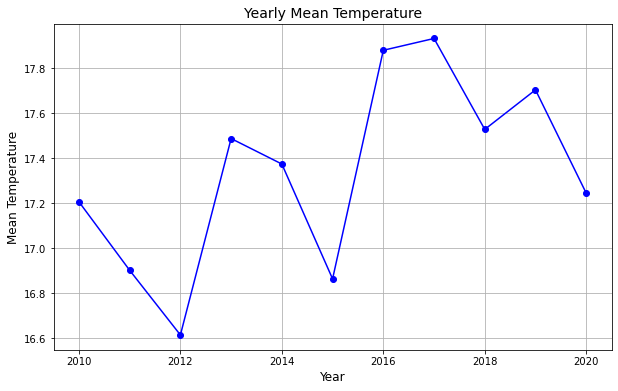

In [24]:

# Group by year and calculate the mean temperature
yearly_mean_temperature = temperature_nsw.groupby('year')['TEMPERATURE'].mean().reset_index()

# Print the yearly mean temperatures
print(yearly_mean_temperature)

# Plot the yearly mean temperatures to visualize the trend
plt.figure(figsize=(10,6))
plt.plot(yearly_mean_temperature['year'], yearly_mean_temperature['TEMPERATURE'], marker='o', color='blue', linestyle='-')
plt.title('Yearly Mean Temperature', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Temperature', fontsize=12)
plt.grid(True)
plt.show()

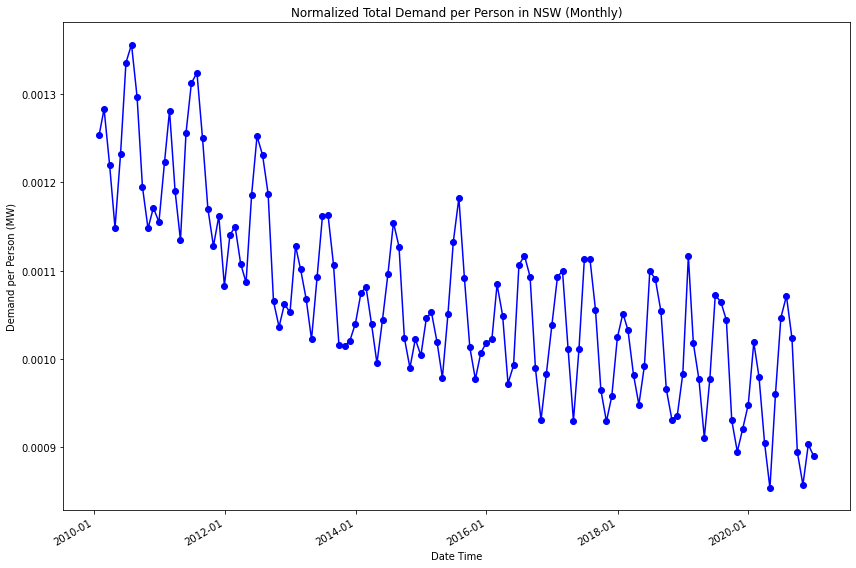

In [27]:
# Ensure the population data has the correct columns
population_nsw = population_nsw.rename(columns={'Year': 'year', 'TotalPopulation': 'TotalPopulation'})

# Convert 'DATETIME' to datetime
#totaldemand_nsw['DATETIME'] = pd.to_datetime(totaldemand_nsw['DATETIME'])

# Set 'DATETIME' as the index
#totaldemand_nsw = totaldemand_nsw.set_index('DATETIME')

# Resample the data for monthly mean values
monthly_totaldemand_nsw = totaldemand_nsw.resample('M').mean()

# Extract year and month from index
monthly_totaldemand_nsw['year'] = monthly_totaldemand_nsw.index.year
monthly_totaldemand_nsw['month'] = monthly_totaldemand_nsw.index.month

# Aggregate population data to monthly level
monthly_population_nsw = population_nsw.set_index('year').reindex(monthly_totaldemand_nsw['year'].unique()).ffill()

# Merge monthly total demand with monthly population data
monthly_data = pd.merge(monthly_totaldemand_nsw, monthly_population_nsw, left_on='year', right_index=True)

# Normalize total demand by population
monthly_data['demand_per_person'] = monthly_data['TOTALDEMAND'] / monthly_data['TotalPopulation']

# Plot the normalized demand
plt.figure(figsize=(12, 8))
plt.plot(monthly_data.index, monthly_data['demand_per_person'], linestyle='-', marker='o', color='b')

plt.title('Normalized Total Demand per Person in NSW (Monthly)')
plt.xlabel('Date Time')
plt.ylabel('Demand per Person (MW)')

# Format the x-axis to show years and months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

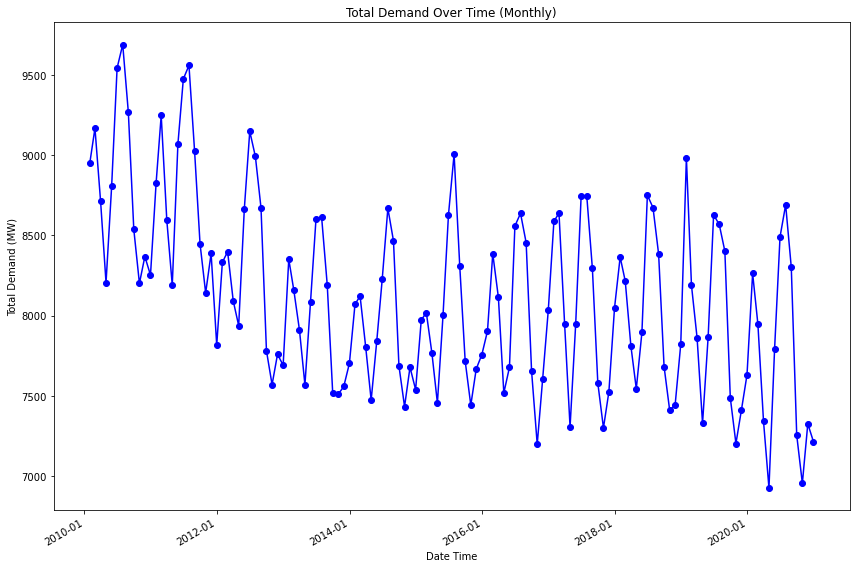

In [28]:

monthly_totaldemand_nsw = totaldemand_nsw.resample('M').mean()

# Plot the monthly total demand
plt.figure(figsize=(12, 8))
plt.plot(monthly_totaldemand_nsw.index, monthly_totaldemand_nsw['TOTALDEMAND'], linestyle='-', marker='o', color='b')

# Set plot title and labels
plt.title('Total Demand Over Time (Monthly)')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

# Format the x-axis to show years and months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
temperature_nsw.head()

,year,month,day,date,DATETIME,TEMPERATURE
0,2010,1,1,2010-01-01,2010-01-01 00:00:00,23.1
1,2010,1,1,2010-01-01,2010-01-01 00:01:00,23.1
2,2010,1,1,2010-01-01,2010-01-01 00:30:00,22.9
3,2010,1,1,2010-01-01,2010-01-01 00:50:00,22.7
4,2010,1,1,2010-01-01,2010-01-01 01:00:00,22.6


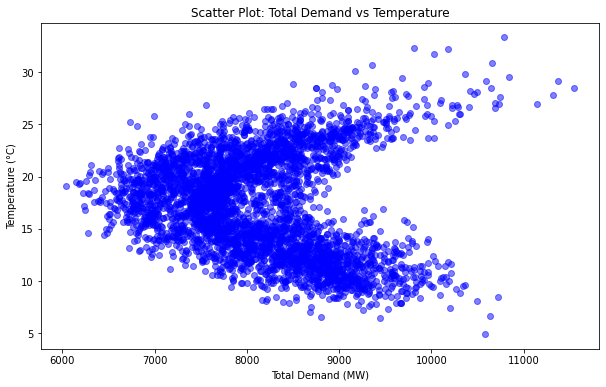

In [33]:

temperature_nsw = temperature_nsw.set_index('DATETIME')
# Resample the temperature data to match the frequency of total demand data (e.g., daily)
daily_temperature_nsw = temperature_nsw.resample('D').mean()

# Assuming totaldemand_nsw is already set with 'DATETIME' as the index
# Merge the data on DateTime index
combined_data = pd.merge(daily_totaldemand_nsw, daily_temperature_nsw, left_index=True, right_index=True, how='inner')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['TOTALDEMAND'], combined_data['TEMPERATURE'], alpha=0.5, color='blue')

# Set plot title and labels
plt.title('Scatter Plot: Total Demand vs Temperature')
plt.xlabel('Total Demand (MW)')
plt.ylabel('Temperature (°C)')

# Show plot
plt.show()

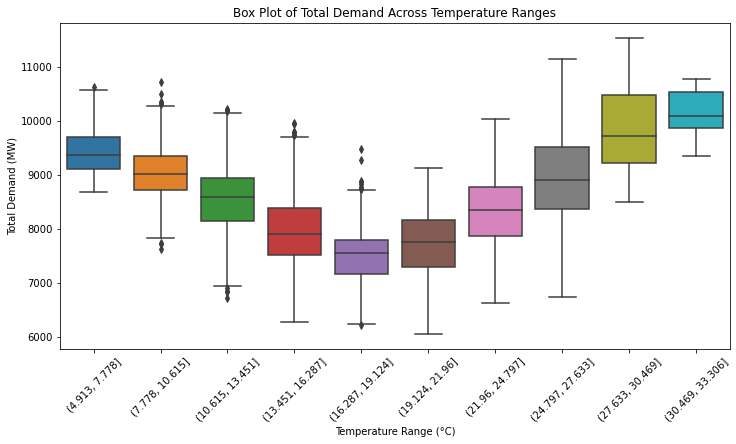

In [34]:
combined_data['Temperature_Bin'] = pd.cut(combined_data['TEMPERATURE'], bins=10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temperature_Bin', y='TOTALDEMAND', data=combined_data)
plt.title('Box Plot of Total Demand Across Temperature Ranges')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Total Demand (MW)')
plt.xticks(rotation=45)
plt.show()


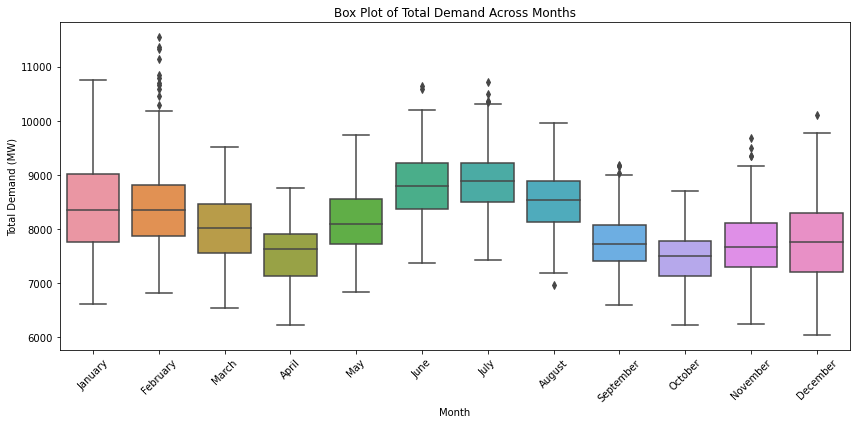

In [35]:
# Extract the month from the datetime index
combined_data['Month'] = combined_data.index.month

# Map month numbers to month names for better readability
combined_data['Month_Name'] = combined_data['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

# Create the box plot for total demand across months
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Name', y='TOTALDEMAND', data=combined_data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Set plot title and labels
plt.title('Box Plot of Total Demand Across Months')
plt.xlabel('Month')
plt.ylabel('Total Demand (MW)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


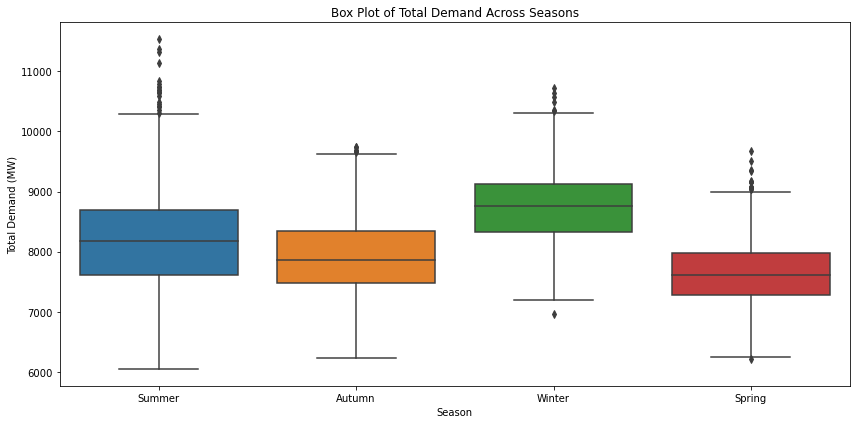

In [36]:
# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Extract the month from the datetime index and categorize by season
combined_data['Month'] = combined_data.index.month
combined_data['Season'] = combined_data['Month'].apply(get_season)

# Create a box plot for total demand across seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='TOTALDEMAND', data=combined_data, order=['Summer', 'Autumn', 'Winter', 'Spring'])

# Set plot title and labels
plt.title('Box Plot of Total Demand Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Demand (MW)')

# Show the plot
plt.tight_layout()
plt.show()


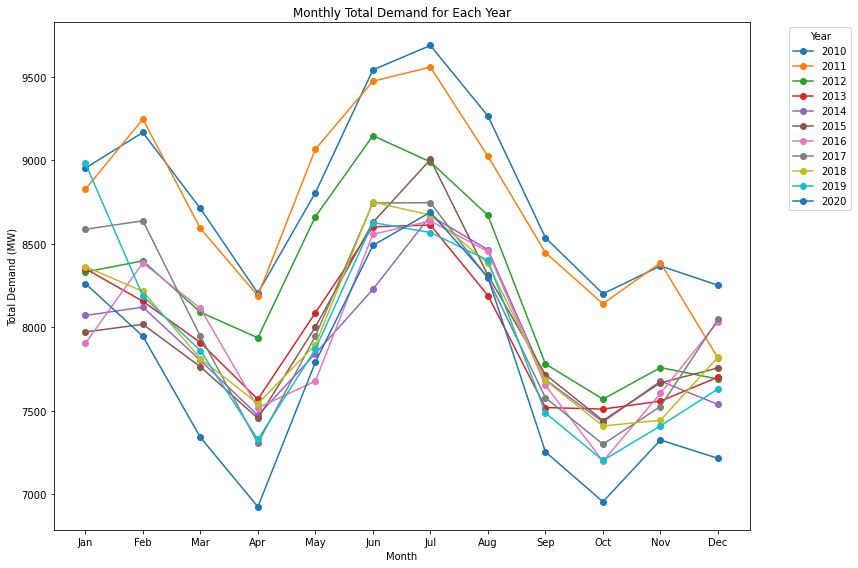

In [37]:



#Resample the data to monthly frequency, using the mean for each month
monthly_total_demand = totaldemand_nsw.resample('M').mean()

# Plot the monthly total demand for each year
plt.figure(figsize=(12, 8))

# Plot lines for each year
for year in monthly_total_demand.index.year.unique():
    yearly_data = monthly_total_demand[monthly_total_demand.index.year == year]
    plt.plot(yearly_data.index.month, yearly_data['TOTALDEMAND'], marker='o', linestyle='-', label=str(year))

#  Set plot title and labels
plt.title('Monthly Total Demand for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Demand (MW)')

#Set x-axis ticks to show month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#Add a legend to differentiate years
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.tight_layout()
plt.show()



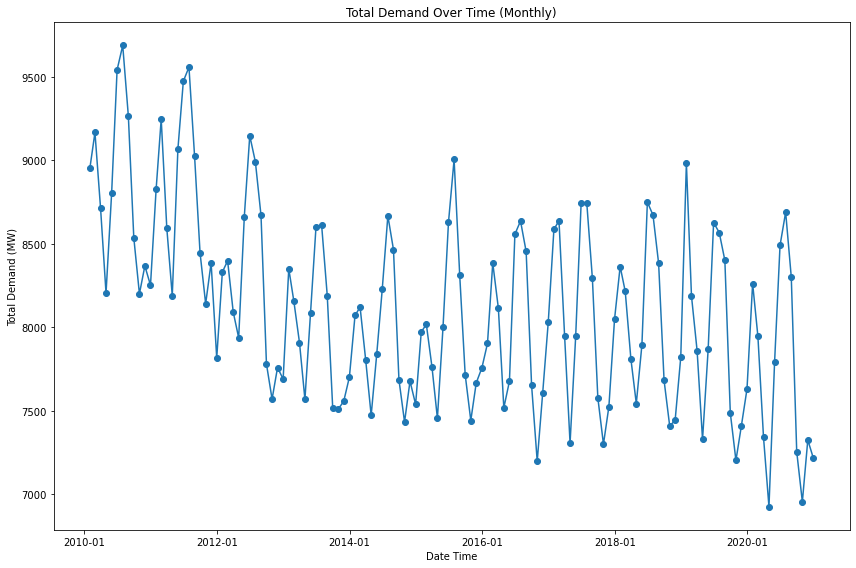

In [38]:

plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(monthly_totaldemand_nsw.index, monthly_totaldemand_nsw['TOTALDEMAND'], linestyle='-', marker='o')

# Set plot title and labels
plt.title('Total Demand Over Time (Monthly)')
plt.xlabel('Date Time')
plt.ylabel('Total Demand (MW)')

# Format the x-axis to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()